In [59]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.offsetbox as offsetbox
import numpy as np
from scipy import misc
from PIL import Image
from PIL import ImageOps

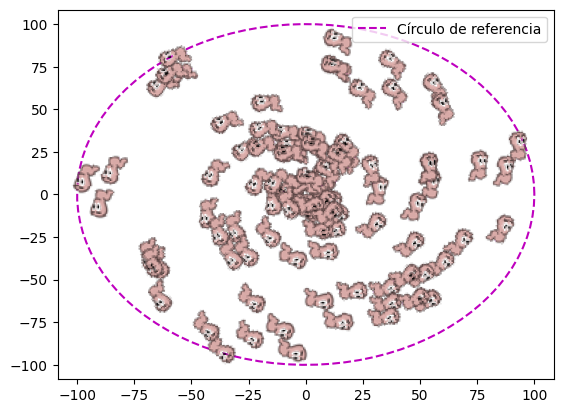

In [63]:
# Definir una función para eliminar el fondo no deseado
def remove_background(image_path):
    img = Image.open(image_path)
    img = img.convert("RGBA")

    data = np.array(img)

    # Establecer píxeles no deseados como transparentes
    red, green, blue, alpha = data[:, :, 0], data[:, :, 1], data[:, :, 2], data[:, :, 3]
    mask = (red > 200) & (green > 200) & (blue > 200) & (alpha > 200)
    data[:, :, :4][mask] = [255, 255, 255, 0]

    img = Image.fromarray(data)
    return img

# Generar los puntos aleatorios
num_worms = 100
angles = np.random.uniform(0, 2 * np.pi, num_worms)
distances = np.random.uniform(1, 100, num_worms)
x = distances * np.cos(angles)
y = distances * np.sin(angles)

# # Cargar y ajustar la imagen del worm
worm_image = remove_background('png-clipart-worms-game-worms-game.png')

# Voltear horizontalmente la imagen del gusano
worm_image_flipped = ImageOps.mirror(worm_image)

# Redimensionar la imagen del worm
image_width = 0.05  # Ancho deseado de la imagen en el gráfico
worm_image_resized = worm_image_flipped.resize((int(worm_image.width * image_width), int(worm_image.height * image_width)))

# Crear el gráfico
fig, ax = plt.subplots()

# Mostrar cada imagen del worm en lugar de los puntos
for xi, yi, angle in zip(x, y, angles):
    worm_rotated = worm_image_resized.rotate(np.degrees(angle))
    image_box = offsetbox.OffsetImage(worm_rotated)
    ab = offsetbox.AnnotationBbox(image_box, (xi, yi), frameon=False)
    ax.add_artist(ab)

# Generar el círculo de referencia
theta = np.linspace(0, 2 * np.pi, 100)
x_circle = 100 * np.cos(theta)
y_circle = 100 * np.sin(theta)

# Agregar el círculo de referencia al gráfico
ax.plot(x_circle, y_circle, 'm--', label='Círculo de referencia')

# Establecer los límites del gráfico
max_distance = max(distances)
ax.set_xlim(-max_distance - 10, max_distance + 10)
ax.set_ylim(-max_distance - 10, max_distance + 10)

# Mostrar la leyenda y el gráfico
ax.legend(loc='upper right')
plt.show()

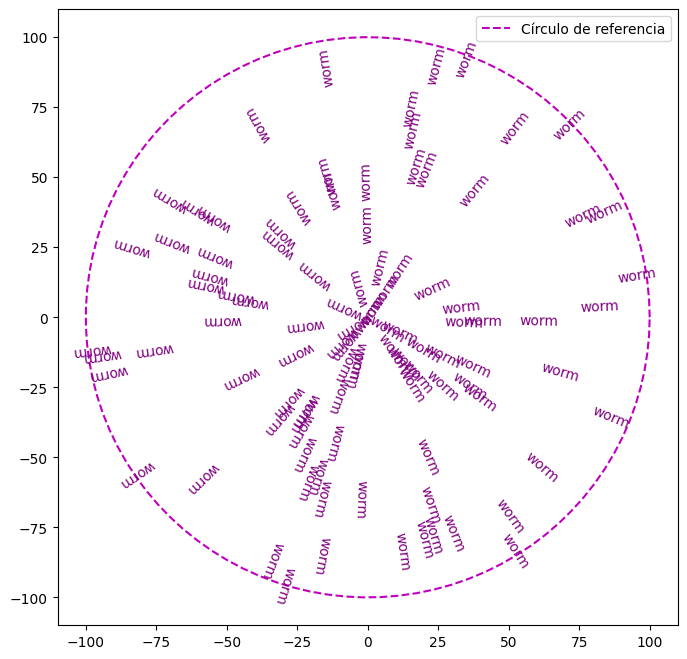

In [52]:
# Generar los puntos aleatorios
num_worms = 100
angles = np.random.uniform(0, 2 * np.pi, num_worms)
distances = np.random.uniform(1, 100, num_worms)
x = distances * np.cos(angles)
y = distances * np.sin(angles)

# Crear el gráfico
fig, ax = plt.subplots(figsize=(8, 8))

# Mostrar cada "-" orientado con el ángulo correspondiente
for xi, yi, angle in zip(x, y, angles):
    plt.text(xi, yi, 'worm', color='purple', ha='center', va='center', fontsize=10, rotation=np.degrees(angle))

# Generar el círculo de referencia
theta = np.linspace(0, 2 * np.pi, 100)
x_circle = 100 * np.cos(theta)
y_circle = 100 * np.sin(theta)

# Agregar el círculo de referencia al gráfico
ax.plot(x_circle, y_circle, 'm--', label='Círculo de referencia')

# Establecer los límites del gráfico
max_distance = max(distances)
ax.set_xlim(-max_distance - 10, max_distance + 10)
ax.set_ylim(-max_distance - 10, max_distance + 10)

# Mostrar la leyenda y el gráfico
ax.legend(loc='upper right')
plt.show()

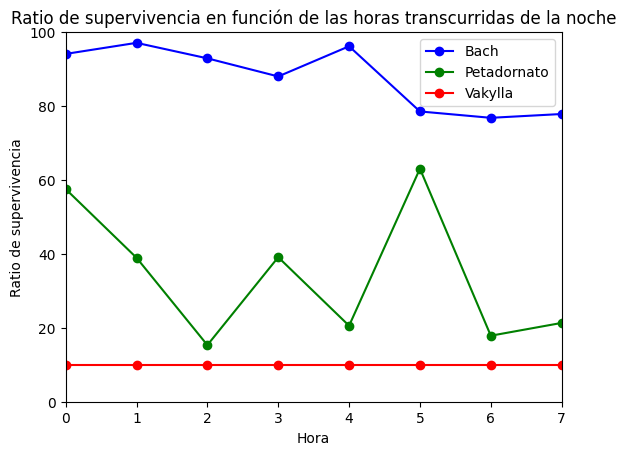

In [77]:
import matplotlib.pyplot as plt
import random

# Definir los datos de las horas transcurridas
horas = range(0, 8)  # Desde las 12 hasta las 7 de la madrugada

# Definir los valores iniciales de los ratios de supervivencia
ratio_bach = 100  # Ratio de supervivencia inicial para la variable Bach
ratio_petadornato = 75  # Ratio de supervivencia inicial para la variable Petadornato
ratio_vakylla = 10  # Ratio de supervivencia inicial para la variable Vakylla (mínimo del 10%)

# Generar variaciones aleatorias
variacion_bach = [random.uniform(-25, 0) for _ in horas]
variacion_petadornato = [random.uniform(-73, 0) for _ in horas]
variacion_vakylla = [random.uniform(0, 10 - ratio_vakylla) for _ in horas]  # Ajustar para alcanzar al menos el 10%

# Calcular los ratios de supervivencia modificados
ratios_supervivencia_bach = [max(min(ratio_bach + variacion, 100), 75) for variacion in variacion_bach]
ratios_supervivencia_petadornato = [max(min(ratio_petadornato + variacion, 75), 2) for variacion in variacion_petadornato]
ratios_supervivencia_vakylla = [max(ratio_vakylla + variacion, 10) for variacion in variacion_vakylla]

# Definir las etiquetas de las variables
variables = ['Bach', 'Petadornato', 'Vakylla']

# Crear el gráfico
plt.plot(horas, ratios_supervivencia_bach, marker='o', linestyle='-', color='b', label=variables[0])
plt.plot(horas, ratios_supervivencia_petadornato, marker='o', linestyle='-', color='g', label=variables[1])
plt.plot(horas, ratios_supervivencia_vakylla, marker='o', linestyle='-', color='r', label=variables[2])

# Establecer límites y etiquetas de los ejes
plt.xlim(0, 7)  # Desde las 12 hasta las 7 de la madrugada
plt.ylim(0, 100)  # Límite superior para el eje y
plt.xlabel('Hora')
plt.ylabel('Ratio de supervivencia')
plt.legend()

# Establecer el título del gráfico
plt.title('Ratio de supervivencia en función de las horas transcurridas de la noche')

# Mostrar el gráfico
plt.show()

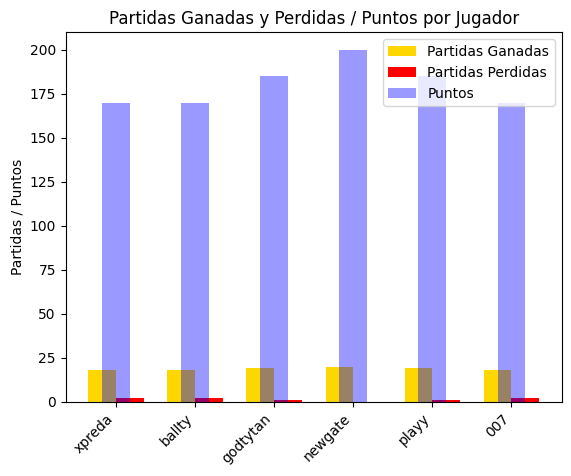

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Definir los jugadores y sus resultados
jugadores = ['xpreda', 'ballty', 'godtytan', 'newgate', 'playy', '007']
partidas_ganadas = [18, 18, 19, 20, 19, 18]
partidas_perdidas = [2, 2, 1, 0, 1, 2]

# Calcular los puntos de cada jugador
puntos = []
for ganadas, perdidas in zip(partidas_ganadas, partidas_perdidas):
    puntaje = ganadas * 10 - perdidas * 5
    puntos.append(puntaje)

# Configurar los colores de las barras
colores_ganadas = 'gold'
colores_perdidas = 'red'

# Crear la variable x con las posiciones de las barras
x = np.arange(len(jugadores))

# Definir el ancho de las barras
ancho = 0.35

# Crear el gráfico de barras
fig, ax = plt.subplots()

# Barras de partidas ganadas
ax.bar(x - ancho/2, partidas_ganadas, width=ancho, color=colores_ganadas, label='Partidas Ganadas')

# Barras de partidas perdidas
ax.bar(x + ancho/2, partidas_perdidas, width=ancho, color=colores_perdidas, label='Partidas Perdidas')

# Barras de los puntos
ax.bar(x, puntos, width=ancho, color='blue', alpha=0.4, label='Puntos')

# Etiquetas de los jugadores en el eje x
ax.set_xticks(x)
ax.set_xticklabels(jugadores, rotation=45, ha='right')

# Configuración de los ejes y la leyenda
ax.set_ylabel('Partidas / Puntos')
ax.set_title('Partidas Ganadas y Perdidas / Puntos por Jugador')
ax.legend()

# Mostrar el gráfico
plt.show()

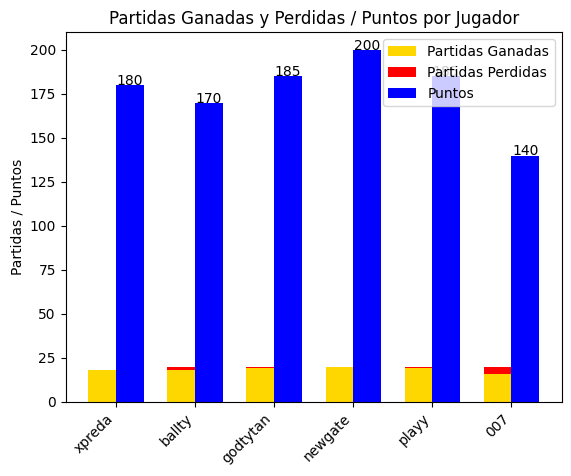

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Definir los jugadores y sus resultados
jugadores = ['xpreda', 'ballty', 'godtytan', 'newgate', 'playy', '007']
partidas_ganadas = [18, 18, 19, 20, 19, 16]
partidas_perdidas = [0, 2, 1, 0, 1, 4]
puntos = []

# Calcular los puntos y configurar los colores de las barras
colores_ganadas = 'gold'
colores_perdidas = 'red'
colores_puntos = 'blue'

for ganadas, perdidas in zip(partidas_ganadas, partidas_perdidas):
    puntaje = ganadas * 10 - perdidas * 5
    puntos.append(puntaje)

# Configurar las posiciones de las barras
x = np.arange(len(jugadores))
ancho = 0.35

# Crear el gráfico de barras
fig, ax = plt.subplots()

# Barras de partidas ganadas y perdidas
ax.bar(x, partidas_ganadas, width=ancho, color=colores_ganadas, label='Partidas Ganadas')
ax.bar(x, partidas_perdidas, width=ancho, bottom=partidas_ganadas, color=colores_perdidas, label='Partidas Perdidas')

# Barras de los puntos
ax.bar(x + ancho, puntos, width=ancho, color=colores_puntos, label='Puntos')

# Etiquetas de los jugadores en el eje x
ax.set_xticks(x + ancho/2)
ax.set_xticklabels(jugadores, rotation=45, ha='right')

# Texto dentro de las barras de puntos
for i, puntaje in enumerate(puntos):
    ax.text(i + ancho, puntaje + 0.1, str(puntaje), ha='center')

# Configuración de los ejes y la leyenda
ax.set_ylabel('Partidas / Puntos')
ax.set_title('Partidas Ganadas y Perdidas / Puntos por Jugador')
ax.legend()

# Mostrar el gráfico
plt.show()

In [103]:
import numpy as np

probabilidad_exitosa = 0.05 / 100   # Probabilidad de éxito (0.05%)
costo_por_intento = 45              # Costo de cada intento
unidades_por_dia = 400              # Unidades obtenidas por día

intentos_por_dia = unidades_por_dia / costo_por_intento

intentos_necesarios = np.ceil(1 / probabilidad_exitosa)
dias_necesarios = np.ceil(intentos_necesarios / intentos_por_dia)

print(f"Se necesitarían aproximadamente {intentos_necesarios} intentos, durante aprox {dias_necesarios} días para obtener la Doll de nivel 3.")

Se necesitarían aproximadamente 2000.0 intentos, durante aprox 225.0 días para obtener la Doll de nivel 3.
